# Plot the pedestal

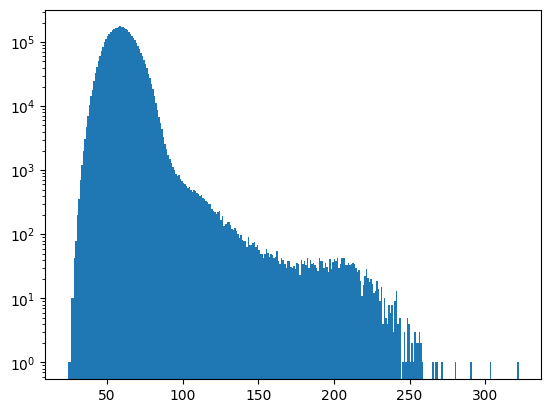

In [2]:
import numpy as np
from histograms import make_histogram
import matplotlib.pyplot as plt

img = np.load("data/images/image8.npy")

# Create a histogram of the image. -1 sets number of bins automatically
bin_centres, hist = make_histogram(img, -1)

# Plot the histogram
plt.bar(bin_centres, hist, width = bin_centres[1]-bin_centres[0])
plt.yscale("log")


# Perform SPC

In [3]:
import numpy as np
from spc import SPC

img = np.load("data/images/image8.npy")
spc = SPC(img, 75, 30, padding=2, fit_area_size=5)

In [4]:
print(f"Single photon hits detected: {spc.n_single_hits}")
print(f"Double photon hits detected: {2*spc.n_double_hits}")

Single photon hits detected: 13552
Double photon hits detected: 254


# Create an energy map

Uncertainties due to peak uncertainties: [ 1.73466171e+01 -1.01996181e+01 -1.43304250e+05  4.15483083e-03]
Uncertainties due to fitting process: [2.30075785e+00 1.31113040e+00 2.06824631e+04 2.23759941e-03]


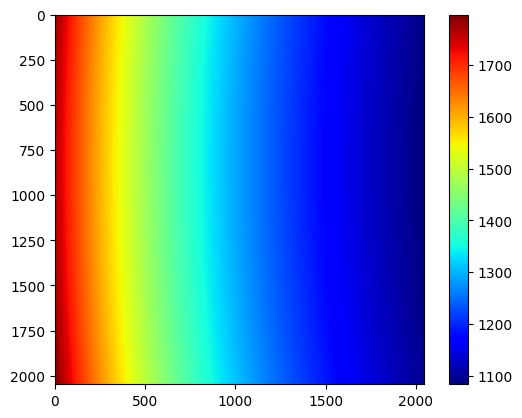

In [8]:
from bragg import EnergyMap

em = EnergyMap(spc.img, 200, 200, 20, 2, 100, 25, [1218.5, 1188.0])

em.create_energy_map()

plt.imshow(em.energy_map, cmap="jet")
plt.colorbar()

# Create a spectrum

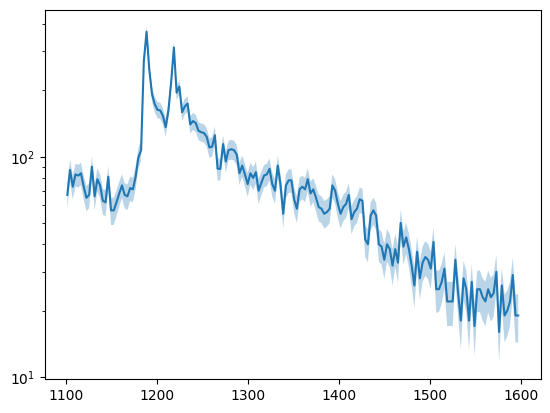

In [13]:
from bragg import Spectrum

spectrum = Spectrum(spc, em, 3, 1100, 1600)

plt.plot(spectrum.bin_centers, spectrum.counts)
plt.fill_between(
    spectrum.bin_centers,
    spectrum.counts - spectrum.count_uncs,
    spectrum.counts + spectrum.count_uncs,
    alpha=0.3,
)
plt.yscale("log")